In [31]:
import json

with open('results.json') as f:
    results = json.load(f)

In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 20)
    fig.set_size_inches(30, 5)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        # image = image / 255.0
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [34]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id}")
    print()
    pair = results[concept_id]
    print(pair["concept"])
    plot_instances(pair["feature"])

Concept #0

[['red', 0.8090564883821378, 615.0], ['four', 0.781227490281671, 615.0], ['blue', 0.22705844517161206, 615.0], ['three', 0.17657644828039457, 615.0], ['angle', 0.10357992879940363, 1230.0], ['round', 0.08802998866318021, 615.0], ['green', 0.07255646689885818, 615.0], ['this', 0.04839082095515851, 1845.0], ['shape', 0.039206508862493224, 1845.0], ['is', 0.0339686785737522, 615.0]]


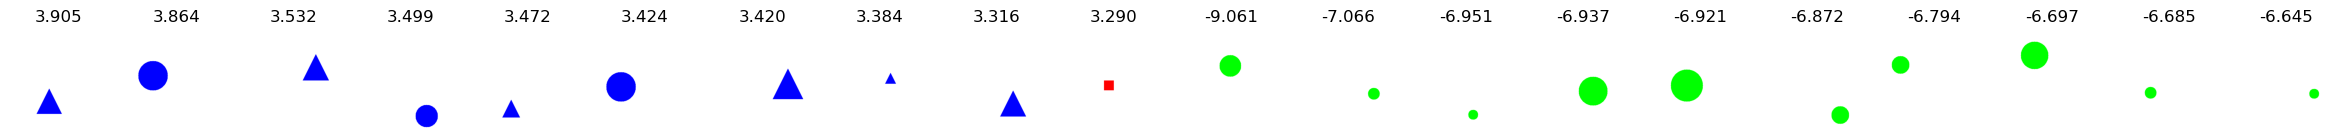

Concept #1

[['blue', 0.7986821832695628, 615.0], ['three', 0.3025370295091373, 615.0], ['green', 0.2160470811089849, 615.0], ['blank', 0.11560588396431282, 871.0], ['white', 0.11448240909798098, 974.0], ['this', 0.07486070962799435, 1845.0], ['left', 0.05724840237330781, 959.0], ['round', 0.05719860935417133, 615.0], ['angle', 0.05633974879737792, 1230.0], ['rotate', 0.05503133728593357, 904.0]]


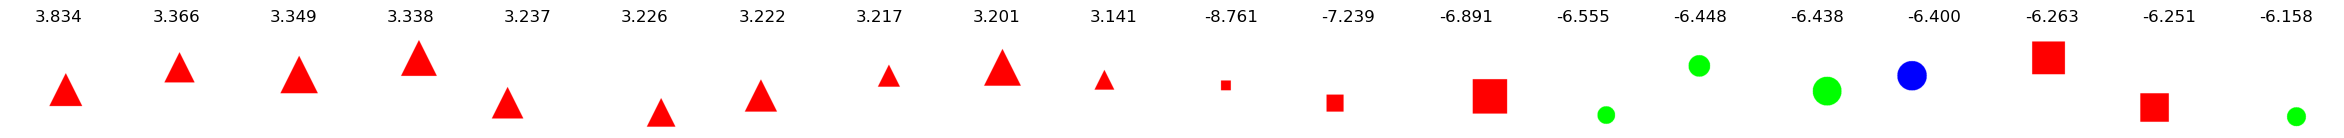

Concept #2

[['green', 0.6040386433766141, 615.0], ['three', 0.4052211210252793, 615.0], ['is', 0.3490941531289884, 615.0], ['red', 0.32086028419132157, 615.0], ['round', 0.22876352934333366, 615.0], ['blue', 0.10382478441664479, 615.0], ['color', 0.0814824756022876, 1845.0], ['four', 0.06483498646960995, 615.0], ['has', 0.05113322783518976, 1230.0], ['shape', 0.05068195968876444, 1845.0]]


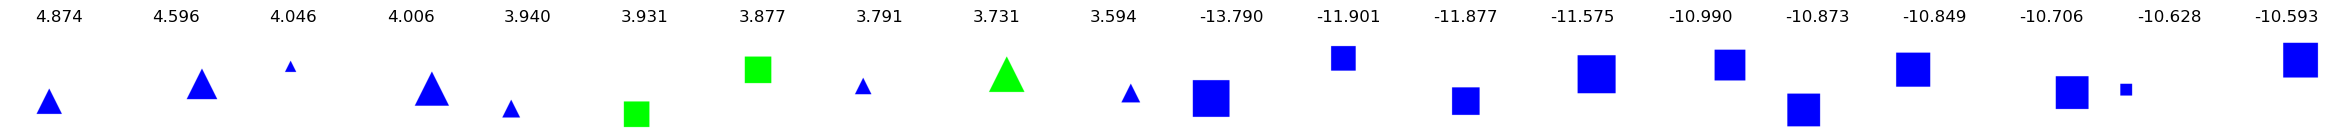

Concept #3

[['four', 0.9687496048648183, 615.0], ['green', 0.4161484460611411, 615.0], ['round', 0.24723592854854537, 615.0], ['three', 0.19225406399587305, 615.0], ['blue', 0.10424977007428017, 615.0], ['this', 0.09021627707053531, 1845.0], ['red', 0.07760784036018015, 615.0], ['left', 0.057800180086918465, 959.0], ['canvas', 0.04128898406542616, 1845.0], ['white', 0.03849960389657967, 974.0]]


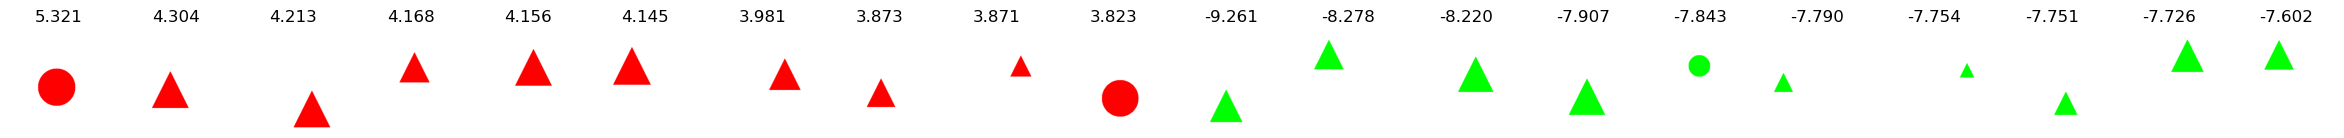

Concept #4

[['green', 0.641432176179033, 615.0], ['blue', 0.43840960448350363, 615.0], ['four', 0.3407529094354893, 615.0], ['angle', 0.29617130801202807, 1230.0], ['round', 0.07471202035866133, 615.0], ['has', 0.07045645661409793, 1230.0], ['is', 0.07041284697569483, 615.0], ['color', 0.05748520262014414, 1845.0], ['up', 0.05565335578551554, 874.0], ['red', 0.04882480377952258, 615.0]]


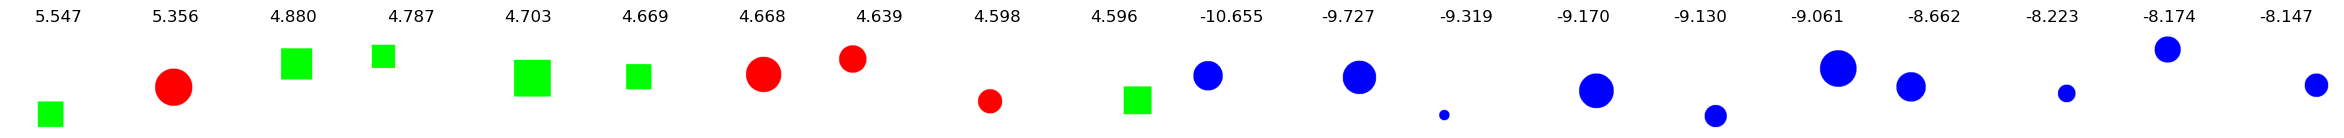

Concept #5

[['blue', 0.7103350590399611, 615.0], ['four', 0.46803878499725, 615.0], ['green', 0.2964338454289165, 615.0], ['round', 0.1465681336032666, 615.0], ['is', 0.13064706382470404, 615.0], ['color', 0.12084950287586588, 1845.0], ['three', 0.08363424578939027, 615.0], ['angle', 0.06439163557639936, 1230.0], ['left', 0.042373560680750454, 959.0], ['right', 0.039048178752140054, 886.0]]


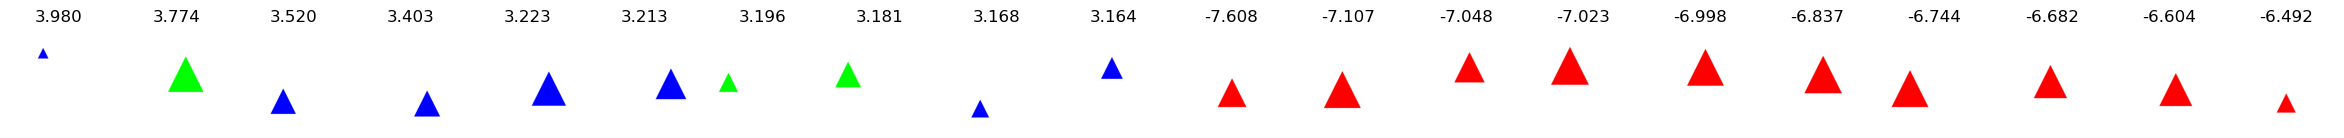

Concept #6

[['red', 0.9538569757608863, 615.0], ['blue', 0.3335640932244014, 615.0], ['four', 0.18998087641851205, 615.0], ['shape', 0.10877747287529553, 1845.0], ['has', 0.08819004492379906, 1230.0], ['green', 0.0863419867264546, 615.0], ['rotate', 0.07997543114161251, 904.0], ['angle', 0.07788207625091924, 1230.0], ['is', 0.0745701521597197, 615.0], ['this', 0.04045251879694702, 1845.0]]


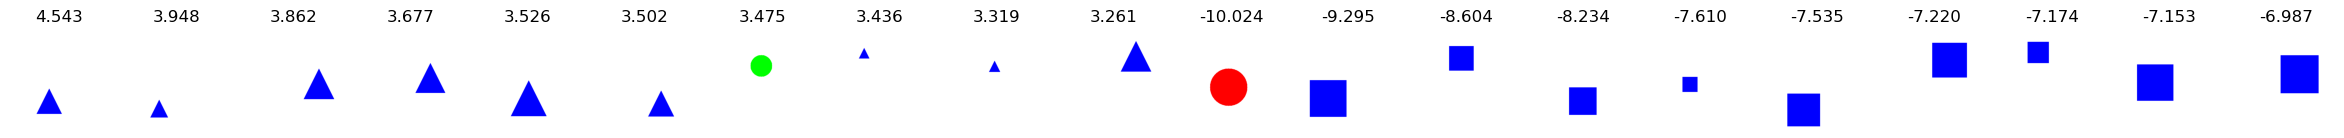

Concept #7

[['green', 0.6792197067563127, 615.0], ['four', 0.4696398051289039, 615.0], ['red', 0.4507654512316231, 615.0], ['round', 0.17475764056046802, 615.0], ['three', 0.1157713853731388, 615.0], ['color', 0.09213356688558086, 1845.0], ['angle', 0.07676032746316698, 1230.0], ['this', 0.06577175907023393, 1845.0], ['blue', 0.038642576282344215, 615.0], ['canvas', 0.030627651188552863, 1845.0]]


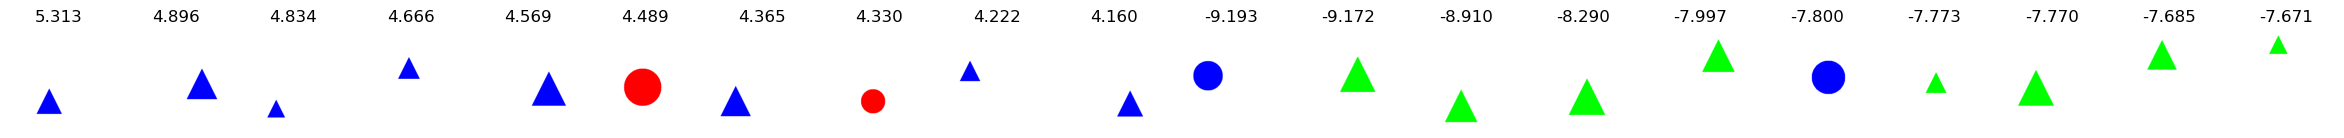

Concept #8

[['red', 0.6640059420732948, 615.0], ['blue', 0.4621279714553337, 615.0], ['four', 0.4097118860337792, 615.0], ['round', 0.1680580376972997, 615.0], ['angle', 0.11878044953251757, 1230.0], ['green', 0.11842224174519865, 615.0], ['color', 0.10548903512765924, 1845.0], ['three', 0.0655448278215358, 615.0], ['is', 0.04223317601150129, 615.0], ['shape', 0.040887787167316045, 1845.0]]


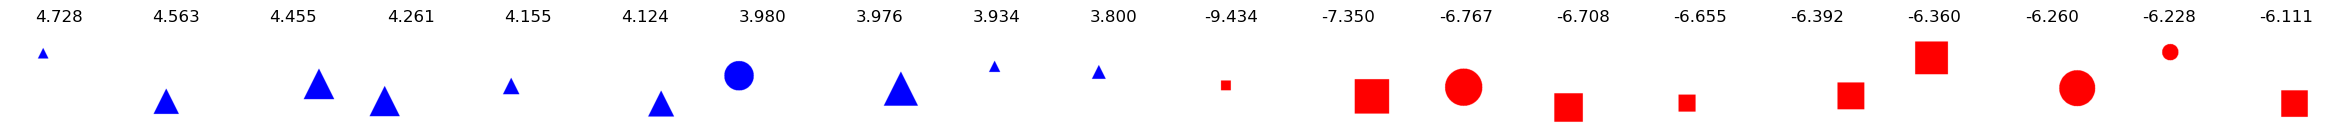

Concept #9

[['four', 0.520202460618523, 615.0], ['blue', 0.3963201732412586, 615.0], ['green', 0.34189809122221254, 615.0], ['round', 0.2305959940683551, 615.0], ['three', 0.17586847266288308, 615.0], ['color', 0.1315508864749334, 1845.0], ['is', 0.12638318797921747, 615.0], ['red', 0.0812207770692866, 615.0], ['left', 0.046634314107835854, 959.0], ['angle', 0.04659635732177554, 1230.0]]


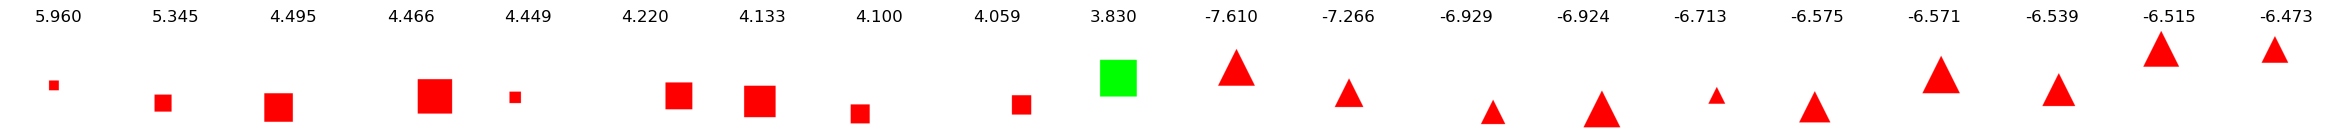

In [35]:
for i in range(10):
    visualize_concept(i)